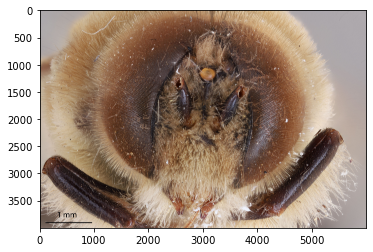

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread("bee1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Display the original and segmented images
plt.imshow(img_rgb)
plt.show()

In [64]:
# Read the image
img = cv2.imread("bee1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image
_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area_threshold = 90000

filtered_contours = []

# # Get the total perimeter of the image
# total_perimeter = (img.shape[0] + img.shape[1]) * 2
# print(total_perimeter)


# Iterate through the contours
for cnt in contours:
 
    area = cv2.contourArea(cnt)
    #x_min, y_min, width, height = cv2.boundingRect(cnt)
    if area > area_threshold:
        perimeter = cv2.arcLength(cnt, True)
        print(perimeter)
        filtered_contours.append(cnt)
   
print(len(filtered_contours))

cv2.drawContours(img, filtered_contours, -1, (0,255,0), 3)

# Compute the convex hull of the contour
hull = cv2.convexHull(filtered_contours[-1])
# Create a white image
mask = np.ones_like(img)*255
# Fill the area outside the convex hull with black pixels
cv2.fillPoly(mask, [hull], (0, 0, 0))
# Invert the mask
mask = cv2.bitwise_not(mask)
# Apply the mask to the original image
result = cv2.bitwise_and(img, mask)

# Show the image with the contours
cv2.namedWindow("Contours", cv2.WINDOW_NORMAL)
cv2.namedWindow("original", cv2.WINDOW_NORMAL)
cv2.imshow("Contours", result)
cv2.imshow("original",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

7218.587661623955
196794.10097575188
2


In [54]:
filtered_contours[-1].shape
#plt.scatter(filtered_contours[-1])

(92848, 1, 2)